In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1: Load the dataset in relevant format and show its properties, e.g. number of records, number of features and their types. (hint: use Pandas Library to read the data). Inspect the dataset and perform data cleaning (e.g. removing duplicate records and fixing missing data).

In [2]:
df_data = pd.read_csv("StudentsPerformance.csv")
df_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df_data.shape

(1001, 8)

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1001 non-null object
lunch                          1001 non-null object
test preparation course        1001 non-null object
math score                     1001 non-null int64
reading score                  1001 non-null int64
writing score                  1001 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.7+ KB


In [5]:
df_data.isnull().sum()

gender                         1
race/ethnicity                 1
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#dropping the null values
df_data = df_data.dropna()
df_data.isnull().sum()
df_data.shape

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

(999, 8)

In [7]:
#dropping the duplicates
df_data.duplicated().sum()
df_data = df_data.drop_duplicates()
df_data.duplicated().sum()
df_data.shape

1

0

(998, 8)

### Task 2: Provide descriptive statistics of the dataset and perform an exploratory data analysis (EDA) to answer the following analysis questions:
#### • Compare students’ exam scores in different subjects (math, reading, writing), What trend did you find?
#### • Who performed better in different subjects male or female students?
#### • Show any attributes (features) that are correlated with exam scores. (e.g. Does parental level of education affect their children exam scores? Does test preparation influence students’ performance?) (hint: use corr()method in Pandas).
(you are encouraged to impose other analysis questions based on any trend
you notice in the dataset).

In [8]:
#Students scored more in Reading than writing and maths, with less standard deviation
df_data.describe()

,math score,reading score,writing score
count,998.000000,998.000000,998.000000
mean,66.092184,69.162325,68.050100
std,15.178097,14.609106,15.210047
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.250000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Count : Shows the total number.
Mean : Shows the average.
Std : Standard deviation value
Min : Minimum value
%25 : First Quantile
%50 : Median or Second Quantile
%75 : Third Quantile
Max : Maximum value

In [9]:
#Male students scored more marks in math while females outperformed the males in Reading and Writing
print ('Math')
df_data.groupby('gender')['math score'].mean()
print ('Reading')
df_data.groupby('gender')['reading score'].mean()
print ('Writing')
df_data.groupby('gender')['writing score'].mean()

Math


gender
female    63.630561
male      68.738046
Name: math score, dtype: float64

Reading


gender
female    72.591876
male      65.476091
Name: reading score, dtype: float64

Writing


gender
female    72.466151
male      63.303534
Name: writing score, dtype: float64

In [100]:
df_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
#scores among the three subjects were highly correlated, which means that’s students who
#scored high in one subject were likely to score high in other two subjects 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.055917,0.028373,-0.023536,0.003928,-0.007500,-0.037764,-0.022749
race/ethnicity,0.055917,1.000000,-0.063330,-0.031605,0.005806,0.064790,0.016921,0.001730
parental level of education,0.028373,-0.063330,1.000000,-0.014877,0.011116,-0.004986,0.045750,-0.027960
lunch,-0.023536,-0.031605,-0.014877,1.000000,0.014719,0.042264,-0.003159,-0.046110
test preparation course,0.003928,0.005806,0.011116,0.014719,1.000000,0.018179,0.046782,0.030259
math score,-0.007500,0.064790,-0.004986,0.042264,0.018179,1.000000,0.121529,0.115829
reading score,-0.037764,0.016921,0.045750,-0.003159,0.046782,0.121529,1.000000,0.193947
writing score,-0.022749,0.001730,-0.027960,-0.046110,0.030259,0.115829,0.193947,1.000000


### Task 3: Show visual representation of your analysis (hint: use data visualization packages such as Matplotlib and Seaborn). 

<Figure size 1080x360 with 0 Axes>

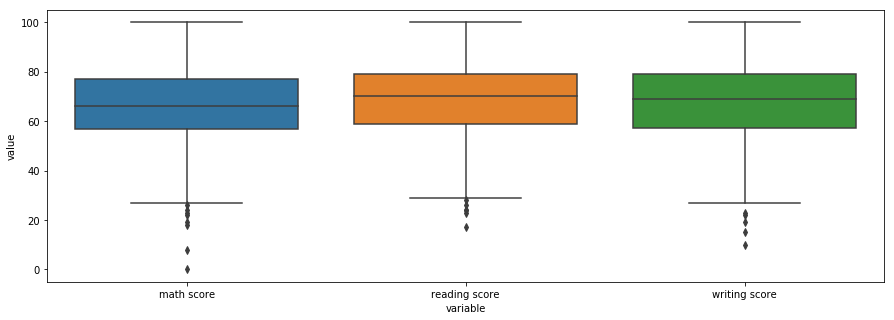

In [40]:
#student scored highest marks in Reading
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.boxplot(x="variable", y="value", data=pd.melt(df_data[['math score','reading score','writing score']]))
plt.show()

Text(0.5,0,'gender')

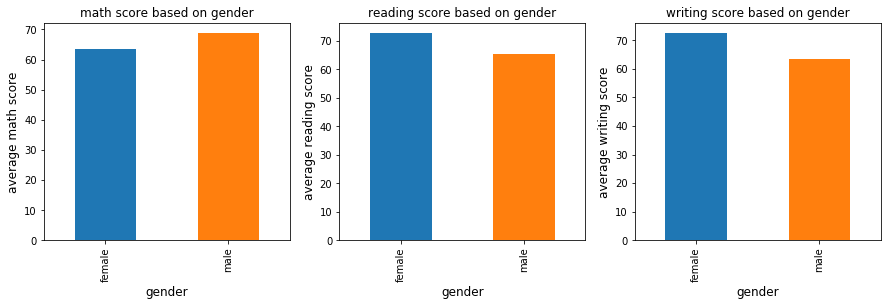

In [17]:
#Male students scored more marks in math while females outperformed the males in Reading and Writing
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
day_wise=df_data.groupby('gender')['math score'].mean().plot.bar()
plt.title("math score based on gender")
plt.ylabel('average math score', fontsize=12)
plt.xlabel('gender', fontsize=12)

plt.subplot(1,3,2)
day_wise=df_data.groupby('gender')['reading score'].mean().plot.bar()
plt.title("reading score based on gender")
plt.ylabel('average reading score', fontsize=12)
plt.xlabel('gender', fontsize=12)

plt.subplot(1,3,3)
day_wise=df_data.groupby('gender')['writing score'].mean().plot.bar()
plt.title("writing score based on gender")
plt.ylabel('average writing score', fontsize=12)
plt.xlabel('gender', fontsize=12)

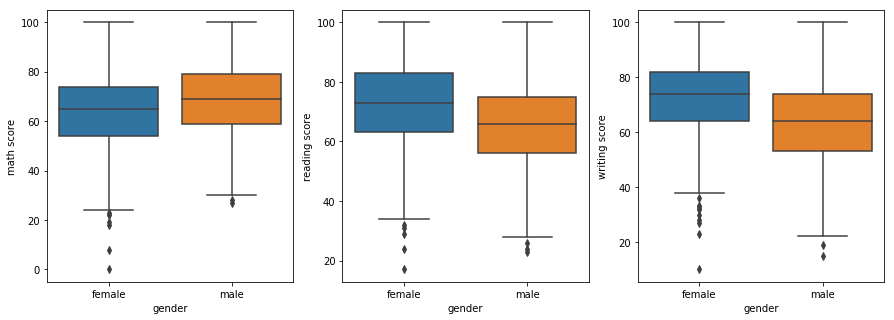

In [18]:
#Male students scored more marks in math while females outperformed the males in Reading and Writing
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df_data['gender'],y=df_data['math score'])

plt.subplot(1,3,2)
sns.boxplot(x=df_data['gender'],y=df_data['reading score'])

plt.subplot(1,3,3)
sns.boxplot(x=df_data['gender'],y=df_data['writing score'])

<Figure size 1080x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Math Score Distribution')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'reading Score Distribution')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'writing Score Distribution')

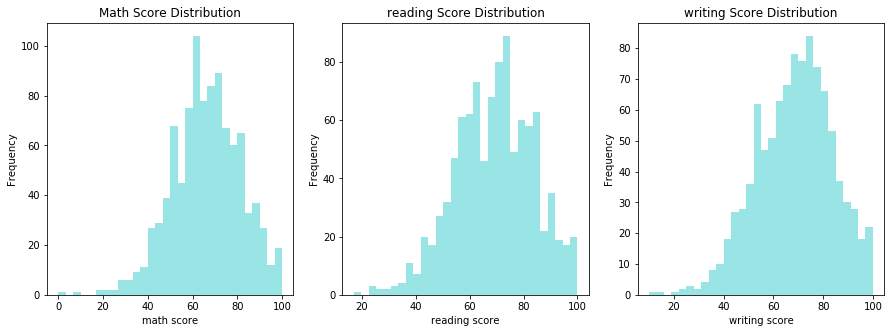

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df_data['math score'], kde = False, color='c', bins = 30)
plt.ylabel('Frequency')
plt.title('Math Score Distribution')

plt.subplot(1,3,2)
sns.distplot(df_data['reading score'], kde = False, color='c', bins = 30)
plt.ylabel('Frequency')
plt.title('reading Score Distribution')

plt.subplot(1,3,3)
sns.distplot(df_data['writing score'], kde = False, color='c', bins = 30)
plt.ylabel('Frequency')
plt.title('writing Score Distribution')

<Figure size 1152x360 with 0 Axes>

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

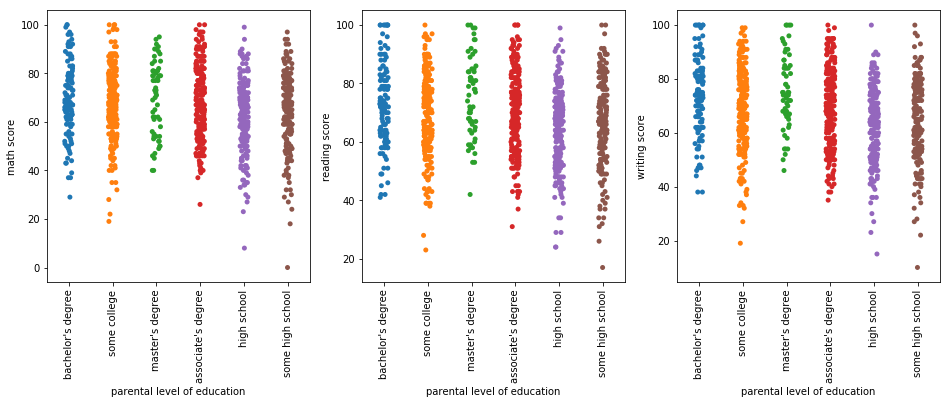

In [85]:
# the students whose parents were highly educated were less likely to score low grade marks in the all the subjects
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.stripplot(x="parental level of education",y='math score',data=df_data)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.stripplot(x="parental level of education",y='reading score',data=df_data)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.stripplot(x="parental level of education",y='writing score',data=df_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

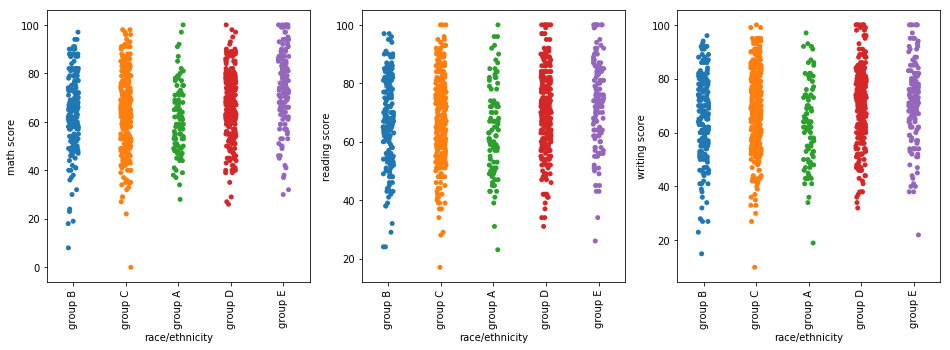

In [22]:
# Group E students were mostly scoring high marks compared too Group B, although the trend varied across different subjects
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.stripplot(x="race/ethnicity",y='math score',data=df_data)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.stripplot(x="race/ethnicity",y='reading score',data=df_data)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.stripplot(x="race/ethnicity",y='writing score',data=df_data)
plt.xticks(rotation=90)

Text(0.5,0,'test preparation course')

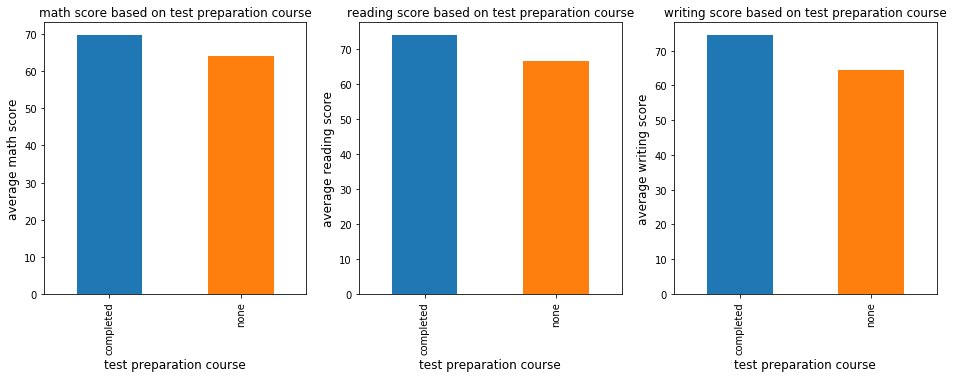

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
day_wise=df_data.groupby('test preparation course')['math score'].mean().plot.bar()
plt.title("math score based on test preparation course")
plt.ylabel('average math score', fontsize=12)
plt.xlabel('test preparation course', fontsize=12)

plt.subplot(1,3,2)
day_wise=df_data.groupby('test preparation course')['reading score'].mean().plot.bar()
plt.title("reading score based on test preparation course")
plt.ylabel('average reading score', fontsize=12)
plt.xlabel('test preparation course', fontsize=12)

plt.subplot(1,3,3)
day_wise=df_data.groupby('test preparation course')['writing score'].mean().plot.bar()
plt.title("writing score based on test preparation course")
plt.ylabel('average writing score', fontsize=12)
plt.xlabel('test preparation course', fontsize=12)

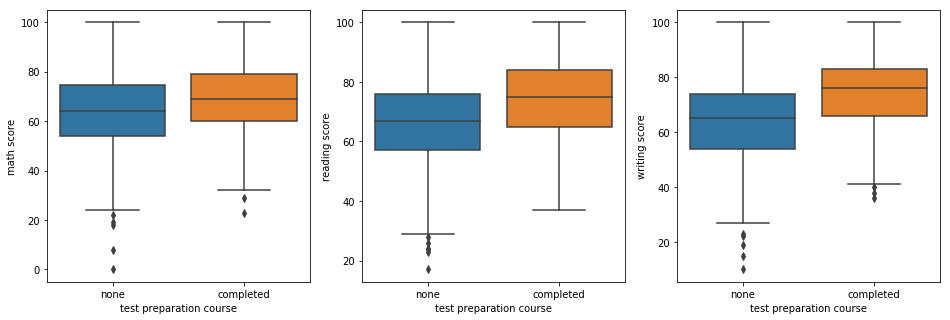

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(x=df_data['test preparation course'],y=df_data['math score'])

plt.subplot(1,3,2)
sns.boxplot(x=df_data['test preparation course'],y=df_data['reading score'])

plt.subplot(1,3,3)
sns.boxplot(x=df_data['test preparation course'],y=df_data['writing score'])

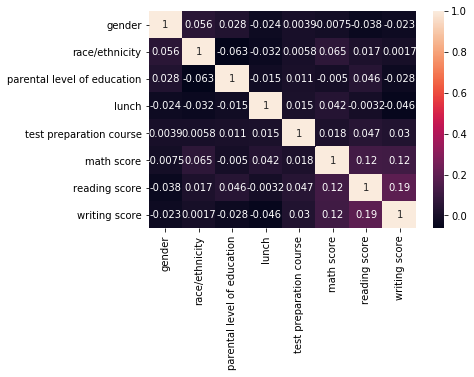

In [11]:
# correlation between numerical data
sns.heatmap(df_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),annot=True)
plt.show()


### Task 4: Build a machine learning model to predict student’s exam performance in each subject given the following attributes: gender, race/ethnicity, parental level of education, lunch, and test preparation course. 


In [12]:
df_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
#checking for number of unique values for object types
df_data['gender'].unique()
df_data['race/ethnicity'].unique()
df_data['parental level of education'].unique()
df_data['lunch'].unique()
df_data['test preparation course'].unique()

array(['female', 'male'], dtype=object)

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

array(['standard', 'free/reduced'], dtype=object)

array(['none', 'completed'], dtype=object)

In [55]:
df_oneHot = pd.get_dummies(df_data)
# df_oneHot.head()
df_oneHot.drop(labels=['gender_male','lunch_standard','test preparation course_none'], axis =1, inplace = True) #dropping the redundant binary columns
df_oneHot.head()

,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
0,72,72,74,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,69,90,88,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,90,95,93,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,47,57,44,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,76,78,75,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [71]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_oneHot,test_size = 0.2,random_state=42) #train and test data split in 80/20 ratio

In [91]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [87]:
x_col = ["gender_female",
       "race/ethnicity_group A", "race/ethnicity_group B",
       "race/ethnicity_group C", "race/ethnicity_group D",
       "race/ethnicity_group E",
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       "parental level of education_high school",
       "parental level of education_master's degree",
       "parental level of education_some college",
       "parental level of education_some high school", "lunch_free/reduced",
       "test preparation course_completed"]
y_col = ['math score', 'reading score', 'writing score']

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [92]:
#Grid Search for Math Score
rfc=RandomForestClassifier(random_state=42)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train[x_col], train['math score'])
CV_rfc.best_params_

C:\Users\Usama Baig\AppData\Local\conda\conda\envs\Py36gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [97]:
#Math

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=4, criterion='gini')
# regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(train[x_col], train['math score'])

y_pred = regressor.predict(test.iloc[:,3:])


print('Mean Absolute Error:', metrics.mean_absolute_error(test['math score'], y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test['math score'], y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['math score'], y_pred)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Mean Absolute Error: 12.57
Mean Squared Error: 255.34
Root Mean Squared Error: 15.97936168937921


In [95]:
#Grid Search for Reading Score
rfc=RandomForestClassifier(random_state=42)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train[x_col], train['reading score'])
CV_rfc.best_params_

C:\Users\Usama Baig\AppData\Local\conda\conda\envs\Py36gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [98]:
#Reading

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')
regressor.fit(train[x_col], train['reading score'])

y_pred = regressor.predict(test.iloc[:,3:])


print('Mean Absolute Error:', metrics.mean_absolute_error(test['reading score'], y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test['reading score'], y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['reading score'], y_pred)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Mean Absolute Error: 13.185
Mean Squared Error: 260.905
Root Mean Squared Error: 16.152553977622237


In [96]:
#Grid Search for Writing Score
rfc=RandomForestClassifier(random_state=42)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train[x_col], train['writing score'])
CV_rfc.best_params_

C:\Users\Usama Baig\AppData\Local\conda\conda\envs\Py36gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [99]:
#Writing

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


regressor = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')
regressor.fit(train[x_col], train['writing score'])

y_pred = regressor.predict(test.iloc[:,3:])


print('Mean Absolute Error:', metrics.mean_absolute_error(test['writing score'], y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test['writing score'], y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['writing score'], y_pred)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Mean Absolute Error: 13.01
Mean Squared Error: 268.01
Root Mean Squared Error: 16.37101096450674
